In [2]:
import os
from os.path import join
import re
import math
import pickle as pkl
import time
import numpy as np
import pandas as pd
from easydict import EasyDict as edict
import h5py
import seaborn as sns
import matplotlib.pyplot as plt
from neuro_data_analysis.mat_data_translate_lib import h5_to_dict_simplify, print_hdf5_info
# set the pandas display options width
pd.set_option('display.width', 1000)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)


mat_root = r"S:\Data-Ephys-MAT"
pkl_root = r"S:\Data-Ephys-PKL"
exp_record_pathdict = {"Alfa": r"S:\Exp_Record_Alfa.xlsx", 
                       "Beto": r"S:\ExpSpecTable_Augment.xlsx",
                       "Caos": r"S:\Exp_Record_Caos.xlsx",
                       "Diablito": r"S:\Exp_Record_Diablito.xlsx"}

ExpRecord_CD = pd.concat([pd.read_excel(exp_record_pathdict[Animal]) for Animal in ("Caos", "Diablito")])
exp_mask = ExpRecord_CD.Exp_collection.str.contains('BigGAN_Hessian', na=False) & ~ ExpRecord_CD.Expi.isna()
ExpRecord_Hessian = ExpRecord_CD.loc[exp_mask, :]
exp_mask = ExpRecord_CD.Exp_collection.str.contains('BigGAN_FC6', na=False) & ~ ExpRecord_CD.Expi.isna()
ExpRecord_Evol = ExpRecord_CD.loc[exp_mask, :]
print(ExpRecord_Hessian)
print(ExpRecord_Evol)

    ChanQual  Exp_collection  Expi  WebCam                                           comments                ephysFN                              expControlFN  pref_chan  pref_unit  stim_size                                            stimuli
12       NaN  BigGAN_Hessian   1.0     NaN  Manifold with biggan\n 003 at 309 PM, manifold...      Caos-12022024-003      241202_150857_Caos_selectivity_basic       91.0        NaN        NaN  N:\Stimuli\Evolutions\2024\2024-12-02-Ev-Caos-...
15       NaN  BigGAN_Hessian   2.0     NaN   006 manifold\n alas, it's all dogs\n 006 at 3...      Caos-12022024-006      241202_155547_Caos_selectivity_basic       94.0        NaN        NaN  N:\Stimuli\Evolutions\2024\2024-12-02-Ev-Caos-...
18       NaN  BigGAN_Hessian   3.0     NaN  003 at 239 PM\nmanifold\n(0,0) 2\nhas had arou...      Caos-12042024-003      241204_143902_Caos_selectivity_basic       71.0        NaN        2.0  N:\Stimuli\Evolutions\2024\2024-12-04-Ev-Caos-...
22       NaN  BigGAN_Hessian

In [105]:
for _, exprow in ExpRecord_Evol.iterrows():
    print(exprow.ephysFN,exprow.Expi)
    data = pkl.load(open(join(pkl_root, f"{exprow.ephysFN}.pkl"), "rb"))
    rasters = data["rasters"]
    meta = data["meta"]
    Trials = data["Trials"]
    imageName = np.squeeze(Trials.imageName)
    stimuli_dir = exprow.stimuli
    break

Caos-12022024-002 1.0


In [117]:
for _, exprow in ExpRecord_Evol.iterrows():
    print(exprow.ephysFN,exprow.Expi)
    data = pkl.load(open(join(pkl_root, f"{exprow.ephysFN}.pkl"), "rb"))
    rasters = data["rasters"]
    meta = data["meta"]
    Trials = data["Trials"]
    imageName = np.squeeze(Trials.imageName)
    stimuli_dir = exprow.stimuli
    prefchan = Trials.TrialRecord.User.prefChan
    prefunit = Trials.TrialRecord.User.unit_perChan
    print(prefchan, prefunit)

Caos-12022024-002 1.0
[[91. 91.]] [[2. 2.]]
Caos-12022024-005 2.0
[[94. 94.]] [[1. 1.]]
Caos-12042024-002 3.0
[[71. 71.]] [[2. 2.]]
Caos-12042024-006 4.0
[[72. 72.]] [[1. 1.]]
Caos-12092024-003 5.0
[[92. 92.]] [[2. 2.]]
Caos-12102024-002 6.0
[[68. 68.]] [[2. 2.]]
Caos-12102024-005 7.0
[[69. 69.]] [[1. 1.]]
Diablito-03122024-002 1.0
[[56. 56.]] [[1. 1.]]
Diablito-11122024-002 2.0
[[42. 42.]] [[2. 2.]]
Diablito-11122024-004 3.0
[[34. 34.]] [[2. 2.]]
Diablito-12122024-003 4.0
[[64. 64.]] [[2. 2.]]
Diablito-12122024-005 5.0
[[50. 50.]] [[1. 1.]]


In [112]:
Trials.TrialRecord.User.evoConfiguration

array([[array([[91.]]), array([[91.]])],
       [array([[0.],
               [0.]]), array([[0.],
                              [0.]])],
       [array([[2.]]), array([[2.]])],
       [array([[2.]]), array([[2.]])],
       ['CMAES', 'CMAES']], dtype=object)

In [113]:
Trials.TrialRecord.User.unit_perChan

array([[2., 2.]])

In [114]:
Trials.TrialRecord.User.space_cfg


array([[array([['fc6'],
               [array([0., 0.])]], dtype=object),
        array([['BigGAN'],
               [array([0., 0.])]], dtype=object)]], dtype=object)

In [115]:
prefchan = Trials.TrialRecord.User.prefChan
prefunit = Trials.TrialRecord.User.prefUnit


array([[91., 91.]])

In [109]:
list(Trials.TrialRecord.User)


['Aupdate_freq',
 'TaskObject',
 'TaskObject_cell',
 'allEventInfo',
 'bkgwindow',
 'bonus_per_consecutiveTrial',
 'bonus_per_pic',
 'codes_',
 'continuousChans',
 'currentBlock',
 'evkwindow',
 'evoConfiguration',
 'gen',
 'generatedMax',
 'generatedMean',
 'generatedSem',
 'iConfig',
 'ids_',
 'image_names',
 'images',
 'imposeRng',
 'init_pop_load',
 'init_pop_path',
 'init_sigma',
 'init_x',
 'lastBlock',
 'maximize',
 'meanActivityVector_thisBlock',
 'myFlags',
 'nNaturalImages',
 'nPicsToShow',
 'nThreads',
 'natImagePath',
 'naturalMax',
 'naturalMean',
 'naturalSem',
 'newPicsHome',
 'online',
 'optim_opts',
 'parentDir',
 'picsHome',
 'platform',
 'population_size',
 'pos_perChan',
 'prefChan',
 'psth',
 'psthBins',
 'pythonDir',
 'responseMatrix',
 'rewFinal',
 'rewSize',
 'rewardStructure',
 'scores',
 'scores_record',
 'seeds',
 'serverRef',
 'sharedDirRoot',
 'sigma',
 'space',
 'space_cfg',
 'space_opts',
 'space_setting',
 'stimulusID',
 'stimulusStartCode',
 'synth_imag

In [52]:
for _, exprow in ExpRecord_Hessian.iterrows():
    print(exprow.ephysFN,exprow.Expi)
    data = pkl.load(open(join(pkl_root, f"{exprow.ephysFN}.pkl"), "rb"))
    rasters = data["rasters"]
    meta = data["meta"]
    Trials = data["Trials"]
    imageName = np.squeeze(Trials.imageName)
    stimuli_dir = exprow.stimuli
    break

Caos-12022024-003 1.0


In [25]:
# Organize the unit information
spikeID = meta.spikeID[0].astype(int)
channel_id = spikeID # set alias
unit_id = meta.unitID[0].astype(int)
char_map = {0:"U", 1: 'A', 2: 'B', 3: 'C', 4: 'D', 5: 'E', 6: 'F', 7: 'G', 8: 'H'}
unit_str = [f"{channel_id}{char_map[unit_id]}" for channel_id, unit_id in zip(channel_id, unit_id)]
prefchan = exprow.pref_chan
prefchan_id_allunits = np.where((channel_id == prefchan))[0]
prefunit = 1 # the prefchan is the first unit???
prefchan_id = np.where((channel_id == prefchan) & (unit_id == prefunit))[0]
prefchan_str = unit_str[prefchan_id.item()]
prefchan_id_allunits

array([110, 111], dtype=int64)

In [70]:
import glob
def find_full_image_paths(folder_path, image_names):
    """
    Searches the specified folder for image files whose stem matches the given image names.

    Parameters:
        folder_path (str): Path to the folder containing the images.
        image_names (list of str): List of image name stems to search for.

    Returns:
        dict: A dictionary mapping each imageName to its full filename. If no matching file is found, the value is None.
    """
    files = glob.glob(os.path.join(folder_path, "*"))
    file_map = {}
    for f in files:
        stem = os.path.splitext(os.path.basename(f))[0]
        if stem in image_names:
            file_map[stem] = f
    return {img_name: file_map.get(img_name) for img_name in image_names}


def parse_stim_info(image_names):
    stim_info = []
    re_pattern = r'(noise|class)_eig(\d+)_lin([+-]?\d+\.\d+)'
    for name in image_names: 
        match = re.match(re_pattern, name)
        if match:
            space_name = match.groups()[0]
            eig_value = int(match.groups()[1])
            lin_value = float(match.groups()[2])
            stim_info.append({"img_name": name, "space_name": space_name, "eig_id": eig_value, "lin_dist": lin_value, "hessian_img": True, "trial_ids": indices_per_name[name]})
        else:
            stim_info.append({"img_name": name, "space_name": None, "eig_id": None, "lin_dist": None, "hessian_img": False, "trial_ids": indices_per_name[name]})

    stim_info_df = pd.DataFrame(stim_info)
    return stim_info_df


In [71]:
# parse the image name
unique_imgnames = np.unique(imageName)
uniq_img_full_path_dict = find_full_image_paths(stimuli_dir, unique_imgnames)
indices_per_name = {name: np.where(imageName == name)[0] for name in unique_imgnames} # indices of the trials with the same image name
stim_info_df = parse_stim_info(unique_imgnames)

In [66]:
noise_dist_list = np.sort(stim_info_df.loc[stim_info_df.space_name == 'noise', 'lin_dist'].unique())
noise_eig_list = np.sort(stim_info_df.loc[stim_info_df.space_name == 'noise', 'eig_id'].unique())
noise_idx_array = np.empty((len(noise_eig_list), len(noise_dist_list)), dtype=object)
for i, eig_id in enumerate(noise_eig_list):
    for j, dist in enumerate(noise_dist_list):
        mask = (stim_info_df.space_name == 'noise') & (stim_info_df.eig_id == eig_id) & (stim_info_df.lin_dist == dist)
        assert np.sum(mask) == 1, f"More than one trial found for eig_id {eig_id} and lin_dist {dist}"
        noise_idx_array[i, j] = stim_info_df.loc[mask, 'trial_ids'].values[0]


In [9]:
rasters.shape  # trials x time x units

(798, 200, 120)

In [82]:
from scipy import stats
# neural responses
wdw = slice(50, 200)
bslwdw = slice(0, 45)

respmat = rasters[:, wdw, :].mean(axis=1)
bslmat = rasters[:, bslwdw, :].mean(axis=1)
prefchan_resp_sgtr = respmat[:, prefchan_id] 
prefchan_bsl_sgtr = bslmat[:, prefchan_id]
prefchan_bsl_mean = prefchan_bsl_sgtr.mean()
prefchan_bsl_sem = stats.sem(prefchan_bsl_sgtr, axis=0)
# prefchan_bsl_sem = stats.sem(bslmat, axis=1)

In [83]:
prefchan_bsl_sem

array([1.3682147], dtype=float32)

In [11]:
sgtr_resp_df = pd.DataFrame({"img_name": imageName, "pref_unit_resp": prefchan_resp_sgtr[:, 0]})
sgtr_resp_df = sgtr_resp_df.merge(stim_info_df.drop(columns=['trial_ids']), on="img_name");
sgtr_resp_df.columns

Index(['img_name', 'pref_unit_resp', 'space_name', 'eig_id', 'lin_dist', 'hessian_img'], dtype='object')

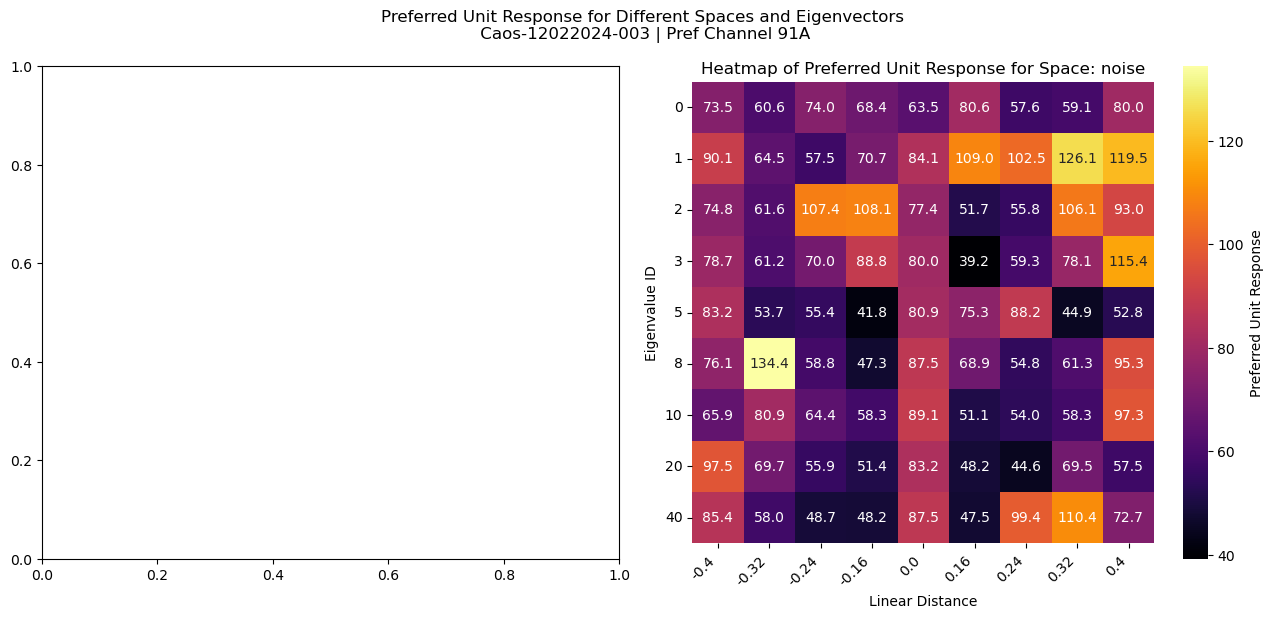

In [30]:
# Group by and compute the mean of preferred unit responses
grouped = sgtr_resp_df.groupby(['space_name', 'eig_id', 'lin_dist']).agg({'pref_unit_resp': 'mean'}).reset_index()
# Pivot the data to create a matrix for each space_name
space_names = grouped['space_name'].unique()
figh, axs = plt.subplots(1, 2, figsize=(13, 6))
for ax, space in zip(axs, ['class', 'noise',]):
    plt.sca(ax)
    space_data = grouped[grouped['space_name'] == space]
    pivot_table = space_data.pivot(index='eig_id', columns='lin_dist', values='pref_unit_resp') # set values as float
    pivot_table = pivot_table.astype(float)
    if pivot_table.empty:
        continue
    sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap='inferno', 
                cbar_kws={'label': 'Preferred Unit Response'}, ax=ax)
    plt.title(f'Heatmap of Preferred Unit Response for Space: {space}')
    plt.xlabel('Linear Distance')
    plt.ylabel('Eigenvalue ID')
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.axis('image')
plt.suptitle(f'Preferred Unit Response for Different Spaces and Eigenvectors \n {exprow.ephysFN} | Pref Channel {prefchan_str} ')
plt.tight_layout()
plt.show()

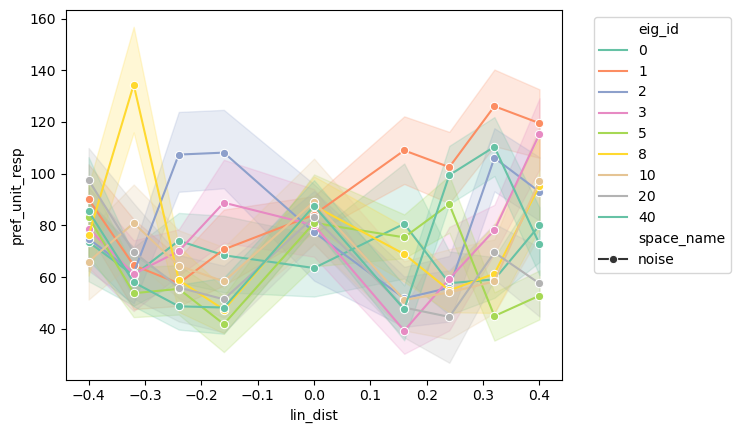

In [41]:
space = "noise"
sns.lineplot(data=sgtr_resp_df, x='lin_dist', y='pref_unit_resp', hue='eig_id', style='space_name', palette='Set2', markers=True)
# sns.scatterplot(data=sgtr_resp_df, x='lin_dist', y='pref_unit_resp', hue='eig_id', style='space_name', palette='Set2', legend=False)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


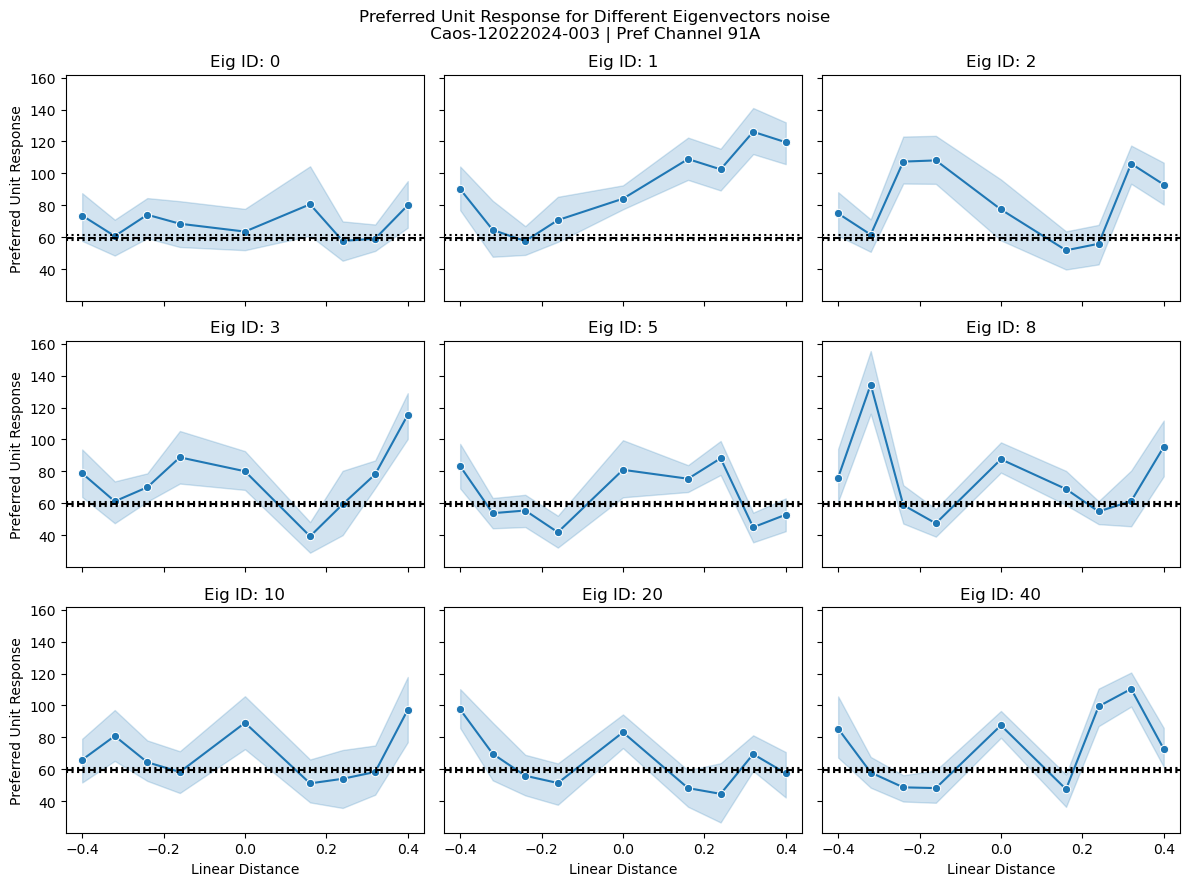

In [104]:

space = "noise"
filtered_df = sgtr_resp_df.query(f"space_name == '{space}'")
unique_eig_ids = sorted(filtered_df['eig_id'].unique())
num_eig_ids = len(unique_eig_ids)
# Determine grid size
cols = 3
rows = math.ceil(num_eig_ids / cols)

fig, axs = plt.subplots(rows, cols, figsize=(cols * 4, rows * 3), sharex=True, sharey=True)
axs = axs.flatten()

for i, eig_id in enumerate(unique_eig_ids):
    ax = axs[i]
    subset = filtered_df[filtered_df['eig_id'] == eig_id]
    sns.lineplot(data=subset, x='lin_dist', y='pref_unit_resp', ax=ax, marker='o') # default to plot 95% confidence interval around the mean
    ax.set_title(f'Eig ID: {eig_id}')
    ax.set_xlabel('Linear Distance')
    ax.set_ylabel('Preferred Unit Response')
    ax.axhline(prefchan_bsl_mean, color='black', linestyle='--', label='Baseline Mean')
    ax.axhline(prefchan_bsl_mean + prefchan_bsl_sem, color='black', linestyle=':', label='Baseline SEM')
    ax.axhline(prefchan_bsl_mean - prefchan_bsl_sem, color='black', linestyle=':')

# Remove any unused subplots
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.suptitle(f'Preferred Unit Response for Different Eigenvectors {space}\n {exprow.ephysFN} | Pref Channel {prefchan_str} ')
# plt.legend(title='Space Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

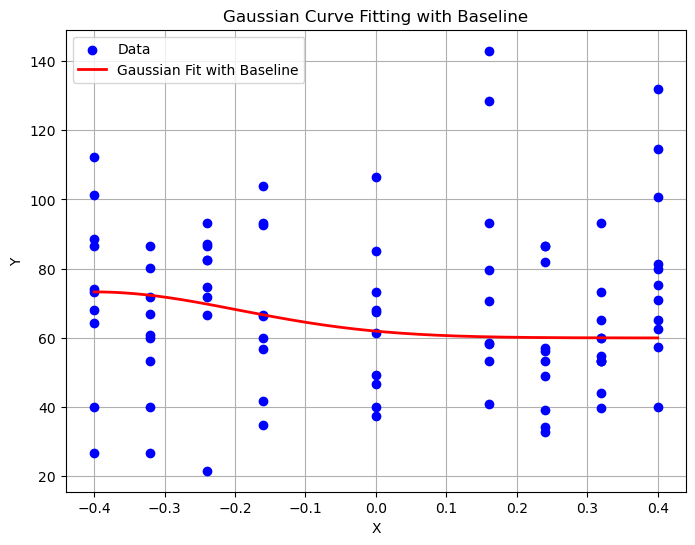

Fitted Parameters:
Amplitude (a): 13.3267
Mean (mu): -0.4000
Standard Deviation (sigma): 0.2044
Baseline: 59.9084


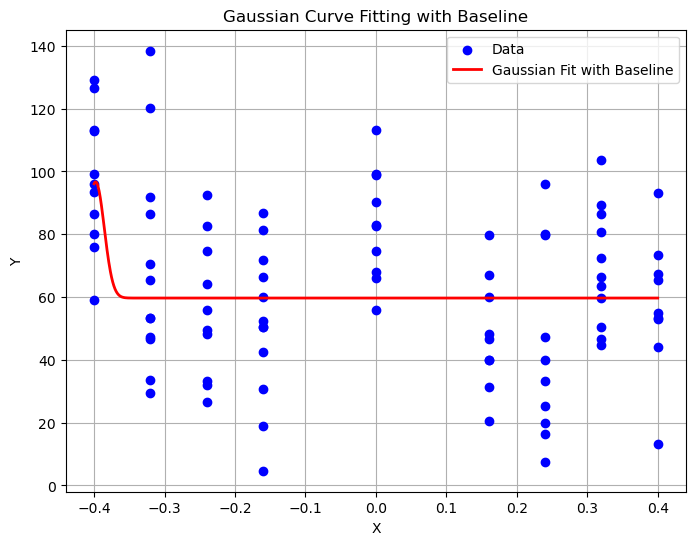

Fitted Parameters:
Amplitude (a): 37.0075
Mean (mu): -0.3978
Standard Deviation (sigma): 0.0122
Baseline: 59.6854
An error occurred during curve fitting: Optimal parameters not found: The maximum number of function evaluations is exceeded.
An error occurred during curve fitting: Optimal parameters not found: The maximum number of function evaluations is exceeded.


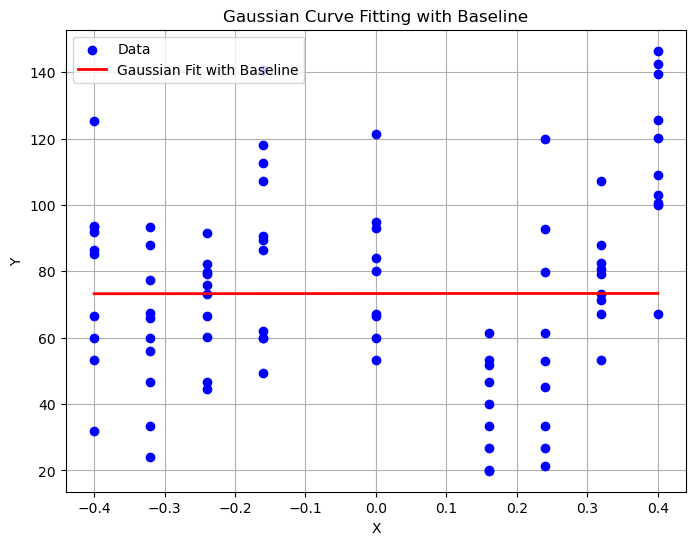

Fitted Parameters:
Amplitude (a): 52.7450
Mean (mu): 0.4000
Standard Deviation (sigma): 14.3619
Baseline: 20.5972


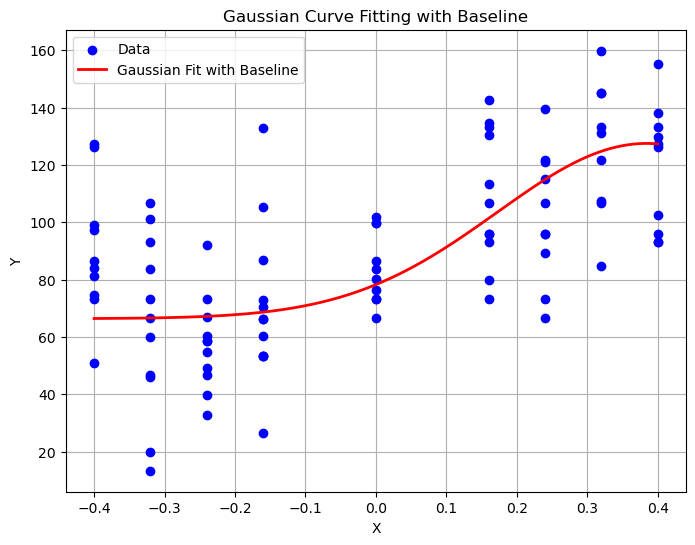

Fitted Parameters:
Amplitude (a): 61.1471
Mean (mu): 0.3844
Standard Deviation (sigma): 0.2124
Baseline: 66.3554


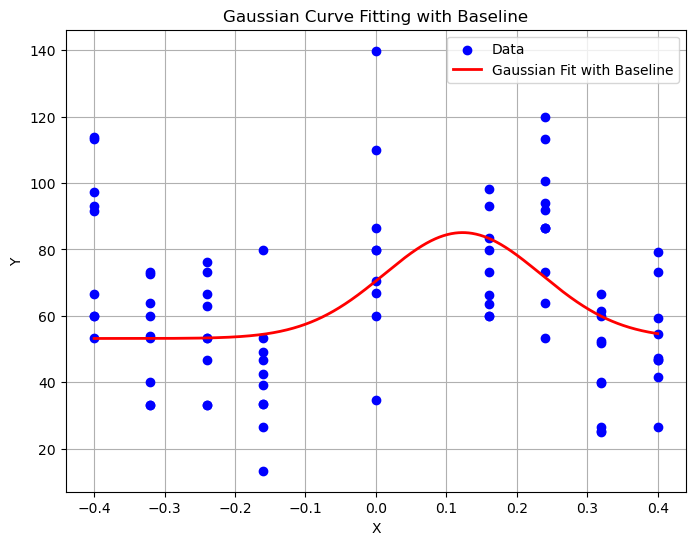

Fitted Parameters:
Amplitude (a): 31.8783
Mean (mu): 0.1230
Standard Deviation (sigma): 0.1114
Baseline: 53.2099


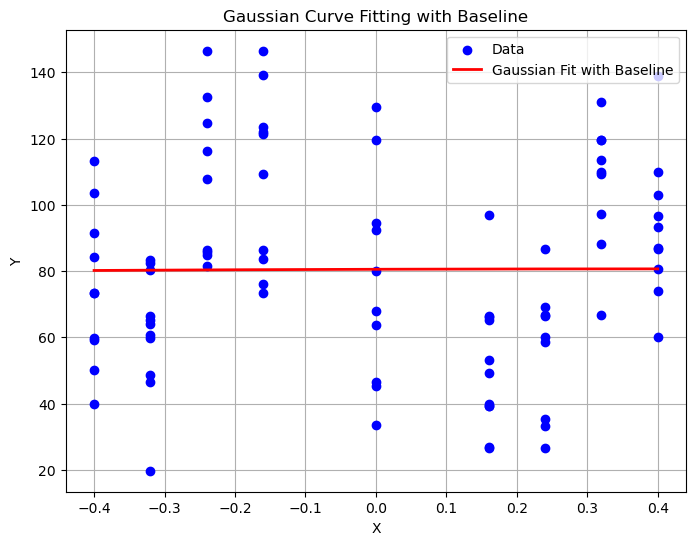

Fitted Parameters:
Amplitude (a): 58.5928
Mean (mu): 0.4000
Standard Deviation (sigma): 6.2165
Baseline: 22.0693


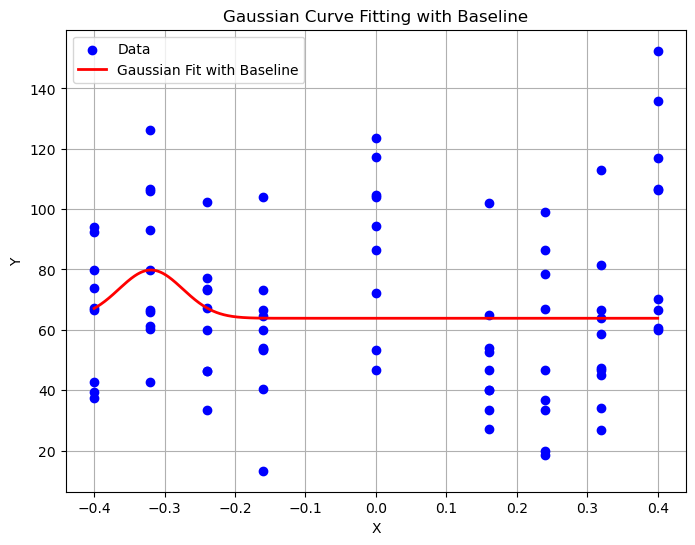

Fitted Parameters:
Amplitude (a): 15.9812
Mean (mu): -0.3193
Standard Deviation (sigma): 0.0453
Baseline: 63.8398


In [103]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Define the Gaussian function with baseline
def gaussian_with_baseline(x, a, mu, sigma, baseline):
    return a * np.exp(-((x - mu) ** 2) / (2 * sigma ** 2)) + baseline

# Function to fit Gaussian curve with baseline
def fit_gaussian_with_baseline(x_data, y_data):
    """
    Fits a Gaussian curve with a baseline to the given data and plots the result.
    
    Args:
        x_data (array-like): Independent variable data (e.g., x-axis points).
        y_data (array-like): Dependent variable data (e.g., y-axis points).
    
    Returns:
        popt (tuple): Optimized parameters (a, mu, sigma, baseline).
        pcov (2D array): Covariance matrix of the parameters.
    """
    # Initial guesses for parameters: amplitude, mean, standard deviation, baseline
    y_range = np.percentile(y_data, [5, 95])  # Use percentiles to avoid outliers
    x_range = np.percentile(x_data, [5, 95])
    
    # More robust initial guesses using percentiles and IQR
    initial_amplitude = y_range[1] - y_range[0]
    initial_mean = np.median(x_data)  # Use median instead of mean
    initial_sigma = (x_range[1] - x_range[0]) / 4  # Estimate from data range
    initial_baseline = y_range[0]
    initial_guess = [initial_amplitude, initial_mean, initial_sigma, initial_baseline]
    
    try:
        # Fit with robust loss function and bounds
        bounds = ([0, min(x_data), 0, min(y_data)],  # Lower bounds
                 [np.inf, max(x_data), np.inf, max(y_data)])  # Upper bounds
        popt, pcov = curve_fit(
            gaussian_with_baseline, x_data, y_data, 
            p0=initial_guess,
            bounds=bounds,
            method='trf',  # Trust Region Reflective algorithm
            loss='huber',  # Huber loss is more robust to outliers
            f_scale=0.1,   # Scale parameter for the loss function
            max_nfev=2000  # Increase max iterations
        )
        
        # Plot original data and fitted curve
        plt.figure(figsize=(8, 6))
        plt.scatter(x_data, y_data, label="Data", color="blue", zorder=2)
        
        # Generate smooth curve for the fitted function
        x_fit = np.linspace(min(x_data), max(x_data), 1000)
        y_fit = gaussian_with_baseline(x_fit, *popt)
        plt.plot(x_fit, y_fit, label="Gaussian Fit with Baseline", color="red", linewidth=2, zorder=3)
        
        plt.title("Gaussian Curve Fitting with Baseline")
        plt.xlabel("X")
        plt.ylabel("Y")
        plt.legend()
        plt.grid(True, zorder=1)
        plt.show()
        
        print("Fitted Parameters:")
        print(f"Amplitude (a): {popt[0]:.4f}")
        print(f"Mean (mu): {popt[1]:.4f}")
        print(f"Standard Deviation (sigma): {popt[2]:.4f}")
        print(f"Baseline: {popt[3]:.4f}")
        
    except Exception as e:
        print(f"An error occurred during curve fitting: {e}")
        popt, pcov = None, None
        
    return popt, pcov

# Example usage (replace with your own data)
# x_data = np.array([...])  # x-axis values
# y_data = np.array([...])  # y-axis values
# fit_gaussian_with_baseline(x_data, y_data)
space = "noise"

for eig_id in sgtr_resp_df.query(f"space_name == '{space}'")["eig_id"].unique():
    sgtr_axis = sgtr_resp_df.query(f"space_name == '{space}' and eig_id == {eig_id}")
    fit_gaussian_with_baseline(sgtr_axis["lin_dist"], sgtr_axis["pref_unit_resp"])

### Dev zone

In [ ]:
stim_info = []
re_pattern = r'(noise|class)_eig(\d+)_lin([+-]?\d+\.\d+)'
for name in unique_imgnames: 
    match = re.match(re_pattern, name)
    if match:
        space_name = match.groups()[0]
        eig_value = int(match.groups()[1])
        lin_value = float(match.groups()[2])
        stim_info.append({"img_name": name, "space_name": space_name, "eig_id": eig_value, "lin_dist": lin_value, "hessian_img": True, "trial_ids": indices_per_name[name]})
    else:
        stim_info.append({"img_name": name, "space_name": None, "eig_id": None, "lin_dist": None, "hessian_img": False, "trial_ids": indices_per_name[name]})

stim_info_df = pd.DataFrame(stim_info)
